**Importing Libraries and Data**

In [ ]:
%matplotlib inline

from fastai.imports import *
import pandas as pd
import numpy as np
import seaborn as sns; sns.set(style="ticks", color_codes=True)

**Loading** Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Path = '/content/drive/My Drive/Train.csv'
df = pd.read_csv(f'{Path}', low_memory=False, parse_dates=["saledate"])

In [ ]:
#This will return the shape of the data i.e, rows and columns in *dataset*
df.shape

(401125, 53)

In [ ]:
# printing top 5 rows for the data
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,521D,521,D,NaN,NaN,NaN,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,950FII,950,F,II,NaN,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,23.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,226,226,NaN,NaN,NaN,NaN,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,OROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,PC120-6E,PC120,NaN,-6E,NaN,Small,"Hydraulic Excavator, Track - 12.0 to 14.0 Metr...",Texas,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,S175,S175,NaN,NaN,NaN,NaN,Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,EROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Function that will display all the columns at once
def showAll(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [ ]:
showAll(df.head().T)

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68,4640,2838,3486,722
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


Displaying last five rows of data with features as rows

In [ ]:
showAll(df.tail().T)

,401120,401121,401122,401123,401124
SalesID,6333336,6333337,6333338,6333341,6333342
SalePrice,10500,11000,11500,9000,7750
MachineID,1840702,1830472,1887659,1903570,1926965
ModelID,21439,21439,21439,21435,21435
datasource,149,149,149,149,149
auctioneerID,1,1,1,2,2
YearMade,2005,2005,2005,2005,2005
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,2011-11-02 00:00:00,2011-11-02 00:00:00,2011-11-02 00:00:00,2011-10-25 00:00:00,2011-10-25 00:00:00


**Data Preprocessing**

This dataset contains a mix of continuous and categorical variables.
We will need to preprocess data to make it suitable for model.

In [ ]:
df.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
count,4.011250e+05,401125.000000,4.011250e+05,401125.000000,401125.000000,380989.000000,401125.000000,1.427650e+05
mean,1.919713e+06,31099.712848,1.217903e+06,6889.702980,134.665810,6.556040,1899.156901,3.457955e+03
std,9.090215e+05,23036.898502,4.409920e+05,6221.777842,8.962237,16.976779,291.797469,2.759026e+04
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00
25%,1.418371e+06,14500.000000,1.088697e+06,3259.000000,132.000000,1.000000,1985.000000,0.000000e+00
50%,1.639422e+06,24000.000000,1.279490e+06,4604.000000,132.000000,2.000000,1995.000000,0.000000e+00
75%,2.242707e+06,40000.000000,1.468067e+06,8724.000000,136.000000,4.000000,2000.000000,3.025000e+03
max,6.333342e+06,142000.000000,2.486330e+06,37198.000000,172.000000,99.000000,2013.000000,2.483300e+06


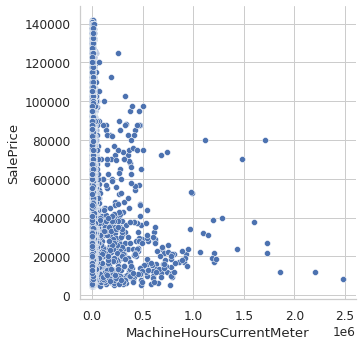

In [ ]:
sns.relplot(x="MachineHoursCurrentMeter", y="SalePrice", data=df);

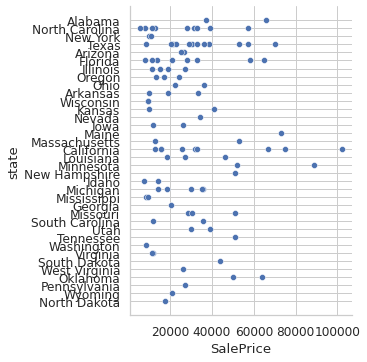

In [ ]:
sns.relplot(y="state", x="SalePrice", data=df.head(100));

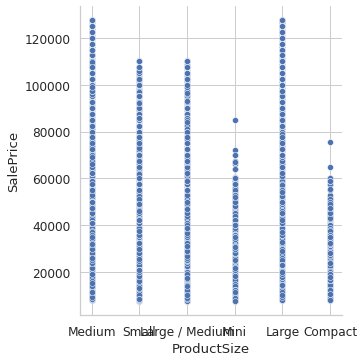

In [ ]:
sns.relplot(x="ProductSize", y="SalePrice", data=df);

In [ ]:
#This function returns the sample, data type and percentage of missing values for feature
def sniff(df):
    with pd.option_context("display.max_colwidth", 100):
        info = pd.DataFrame()
        info["sample"]= df.iloc[0]
        info["data type"] = df.dtypes
        info["missing value percentage"] = df.isnull().sum()*100/len(df)
        return info.sort_values("data type")

In [ ]:
sniff(df)

,sample,data type,missing value percentage
SalesID,1139246,int64,0.000000
SalePrice,66000,int64,0.000000
MachineID,999089,int64,0.000000
ModelID,3157,int64,0.000000
datasource,121,int64,0.000000
YearMade,2004,int64,0.000000
auctioneerID,3,float64,5.019882
MachineHoursCurrentMeter,68,float64,64.408850
saledate,2006-11-16 00:00:00,datetime64[ns],0.000000
Coupler,None or Unspecified,object,46.662013


**Since saledate is of the format date time I made this function for deducing various other features from datetime format**

In [ ]:
def add_datepart(df, fldname, drop=True, time=False):
    fld = df[fldname]
    fld_dtype = fld.dtype
    if isinstance(fld_dtype, pd.core.dtypes.dtypes.DatetimeTZDtype):
        fld_dtype = np.datetime64

    if not np.issubdtype(fld_dtype, np.datetime64):
        df[fldname] = fld = pd.to_datetime(fld, infer_datetime_format=True)
    targ_pre = re.sub('[Dd]ate$', '', fldname)
    attr = ['Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
            'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start']
    if time: attr = attr + ['Hour', 'Minute', 'Second']
    for n in attr: df[targ_pre + n] = getattr(fld.dt, n.lower())
    df[targ_pre + 'Elapsed'] = fld.astype(np.int64) // 10 ** 9
    if drop: df.drop(fldname, axis=1, inplace=True)



In [ ]:
add_datepart(df, "saledate")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  del sys.path[0]


In [ ]:
#provides info corresponding to each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 65 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   401125 non-null  int64  
 1   SalePrice                 401125 non-null  int64  
 2   MachineID                 401125 non-null  int64  
 3   ModelID                   401125 non-null  int64  
 4   datasource                401125 non-null  int64  
 5   auctioneerID              380989 non-null  float64
 6   YearMade                  401125 non-null  int64  
 7   MachineHoursCurrentMeter  142765 non-null  float64
 8   UsageBand                 69639 non-null   object 
 9   fiModelDesc               401125 non-null  object 
 10  fiBaseModel               401125 non-null  object 
 11  fiSecondaryDesc           263934 non-null  object 
 12  fiModelSeries             56908 non-null   object 
 13  fiModelDescriptor         71919 non-null   o

In [ ]:
total_rows = df.count
df.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,saleYear,saleMonth,saleWeek,saleDay,saleDayofweek,saleDayofyear,saleElapsed
count,4.011250e+05,401125.000000,4.011250e+05,401125.000000,401125.000000,380989.000000,401125.000000,1.427650e+05,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,4.011250e+05
mean,1.919713e+06,31099.712848,1.217903e+06,6889.702980,134.665810,6.556040,1899.156901,3.457955e+03,2004.095728,6.407035,26.179864,16.110402,2.600975,179.977581,1.091433e+09
std,9.090215e+05,23036.898502,4.409920e+05,6221.777842,8.962237,16.976779,291.797469,2.759026e+04,5.754190,3.424575,14.788059,8.427322,1.405763,103.559930,1.816977e+08
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00,1989.000000,1.000000,1.000000,1.000000,0.000000,2.000000,6.009984e+08
25%,1.418371e+06,14500.000000,1.088697e+06,3259.000000,132.000000,1.000000,1985.000000,0.000000e+00,2000.000000,3.000000,13.000000,9.000000,2.000000,84.000000,9.708768e+08
50%,1.639422e+06,24000.000000,1.279490e+06,4604.000000,132.000000,2.000000,1995.000000,0.000000e+00,2006.000000,6.000000,25.000000,16.000000,3.000000,168.000000,1.143072e+09
75%,2.242707e+06,40000.000000,1.468067e+06,8724.000000,136.000000,4.000000,2000.000000,3.025000e+03,2009.000000,9.000000,39.000000,23.000000,3.000000,271.000000,1.237853e+09
max,6.333342e+06,142000.000000,2.486330e+06,37198.000000,172.000000,99.000000,2013.000000,2.483300e+06,2011.000000,12.000000,53.000000,31.000000,6.000000,365.000000,1.325203e+09


**As MachineID contains inconsistencies in data we will drop it**

**And as the SalesID is unique it doesn't help in generalizaion**

In [ ]:
df = df.drop("MachineID", axis=1)
df = df.drop("SalesID", axis=1)

The auctioneerID column values look like numbers, but they are really categorical variables, specifically nominal variables that have no order:

In [ ]:
print(df['auctioneerID'].unique())

[ 3.  1.  2. 11.  4.  7. 99.  6.  5. 18. 17. 22. 20. 14. 16. 21.  9. 13.
 12. 23. 10. 15. 19.  8. 28. 25. 27. 24. nan  0. 26.]


Just to make this clear, let's change the data type to be string:

In [ ]:
df['auctioneerID'] = df['auctioneerID'].astype(str)

##Further as a part of preprocessing we will make seperate list of numerical_feature and the categorical_features

In [ ]:
numerical_features = df.select_dtypes([np.number]).columns.tolist()
categorical_features = df.select_dtypes(exclude = [np.number,np.datetime64]).columns.tolist()

In [ ]:
df[numerical_features].head()

,SalePrice,ModelID,datasource,YearMade,MachineHoursCurrentMeter,saleYear,saleMonth,saleWeek,saleDay,saleDayofweek,saleDayofyear,saleElapsed
0,66000,3157,121,2004,68.0,2006,11,46,16,3,320,1163635200
1,57000,77,121,1996,4640.0,2004,3,13,26,4,86,1080259200
2,10000,7009,121,2001,2838.0,2004,2,9,26,3,57,1077753600
3,38500,332,121,2001,3486.0,2011,5,20,19,3,139,1305763200
4,11000,17311,121,2007,722.0,2009,7,30,23,3,204,1248307200


**Density Vs Numerical_features plot since it give us the trend of data and how density varies with respect to avery other feature**

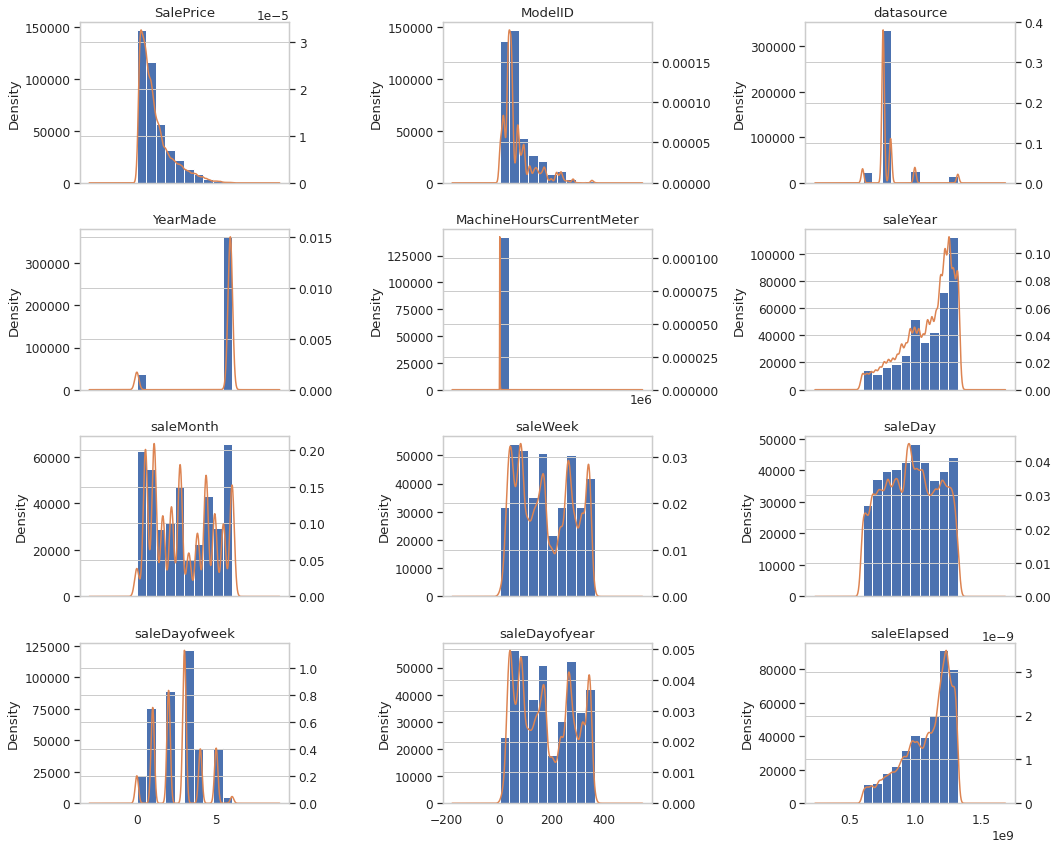

In [ ]:
k = len(df[numerical_features].columns)
n = 3
m = (k - 1) // n + 1 
fig, axes = plt.subplots(m, n, figsize=(n * 5, m * 3))
for i, (name, col) in enumerate(df[numerical_features].iteritems()):
    r, c = i // n, i % n
    ax = axes[r, c]
    col.hist(ax=ax)
    ax2 = col.plot.kde(ax=ax, secondary_y=True, title=name)
    ax2.set_ylim(0)

fig.tight_layout()

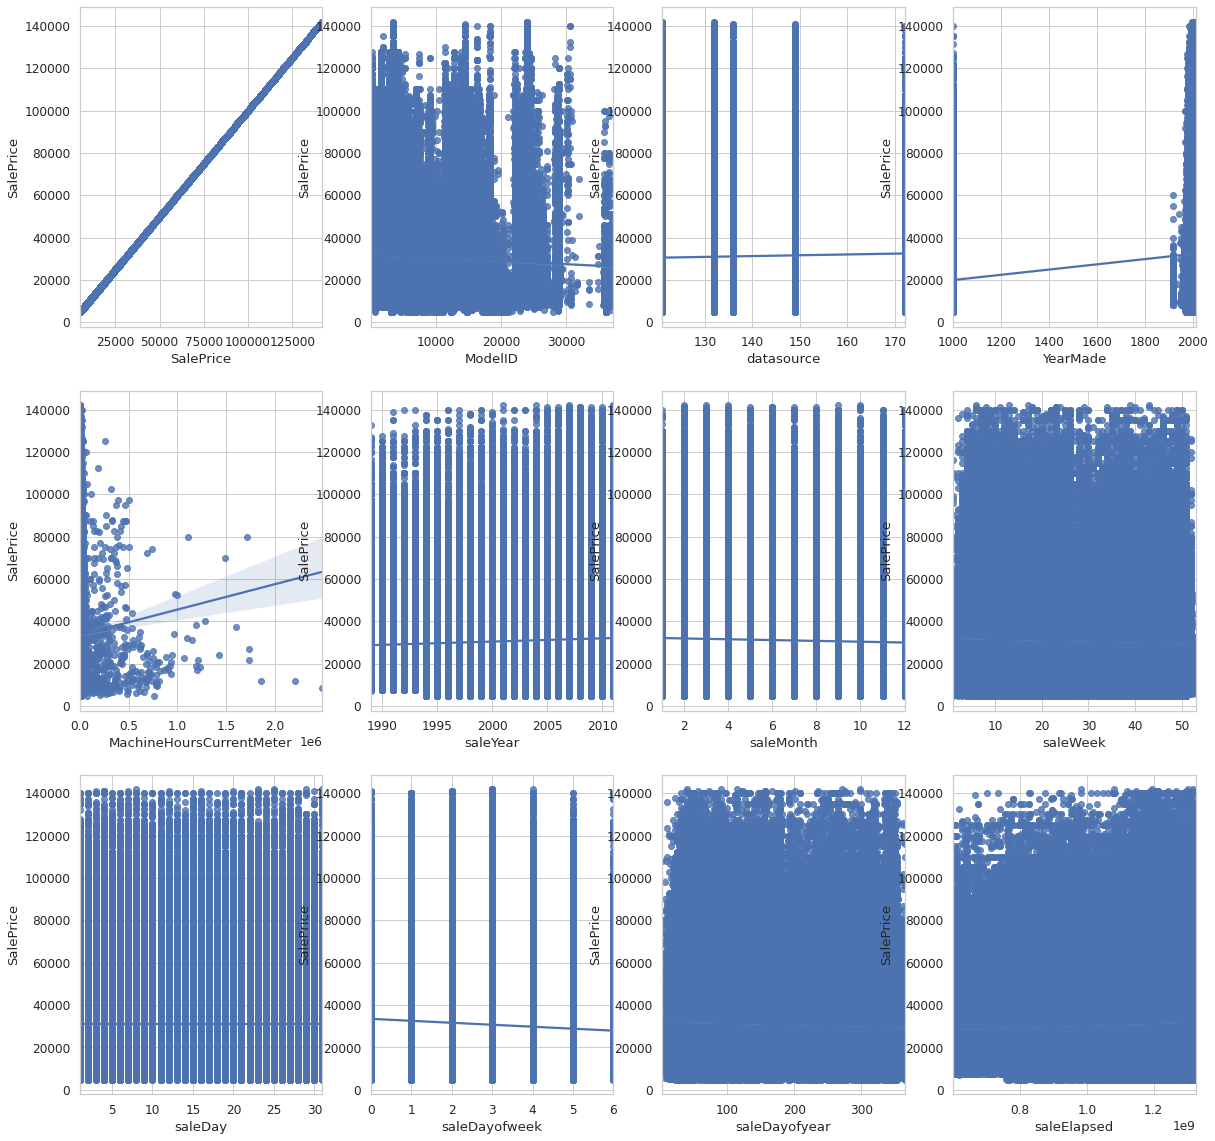

In [ ]:
fig, ax = plt.subplots(3, 4, figsize=(20, 20))
for variable, subplot in zip(numerical_features, ax.flatten()):
    sns.regplot(x=df[variable], y=df['SalePrice'], ax=subplot)


## Heatmap to show the correlation among various features

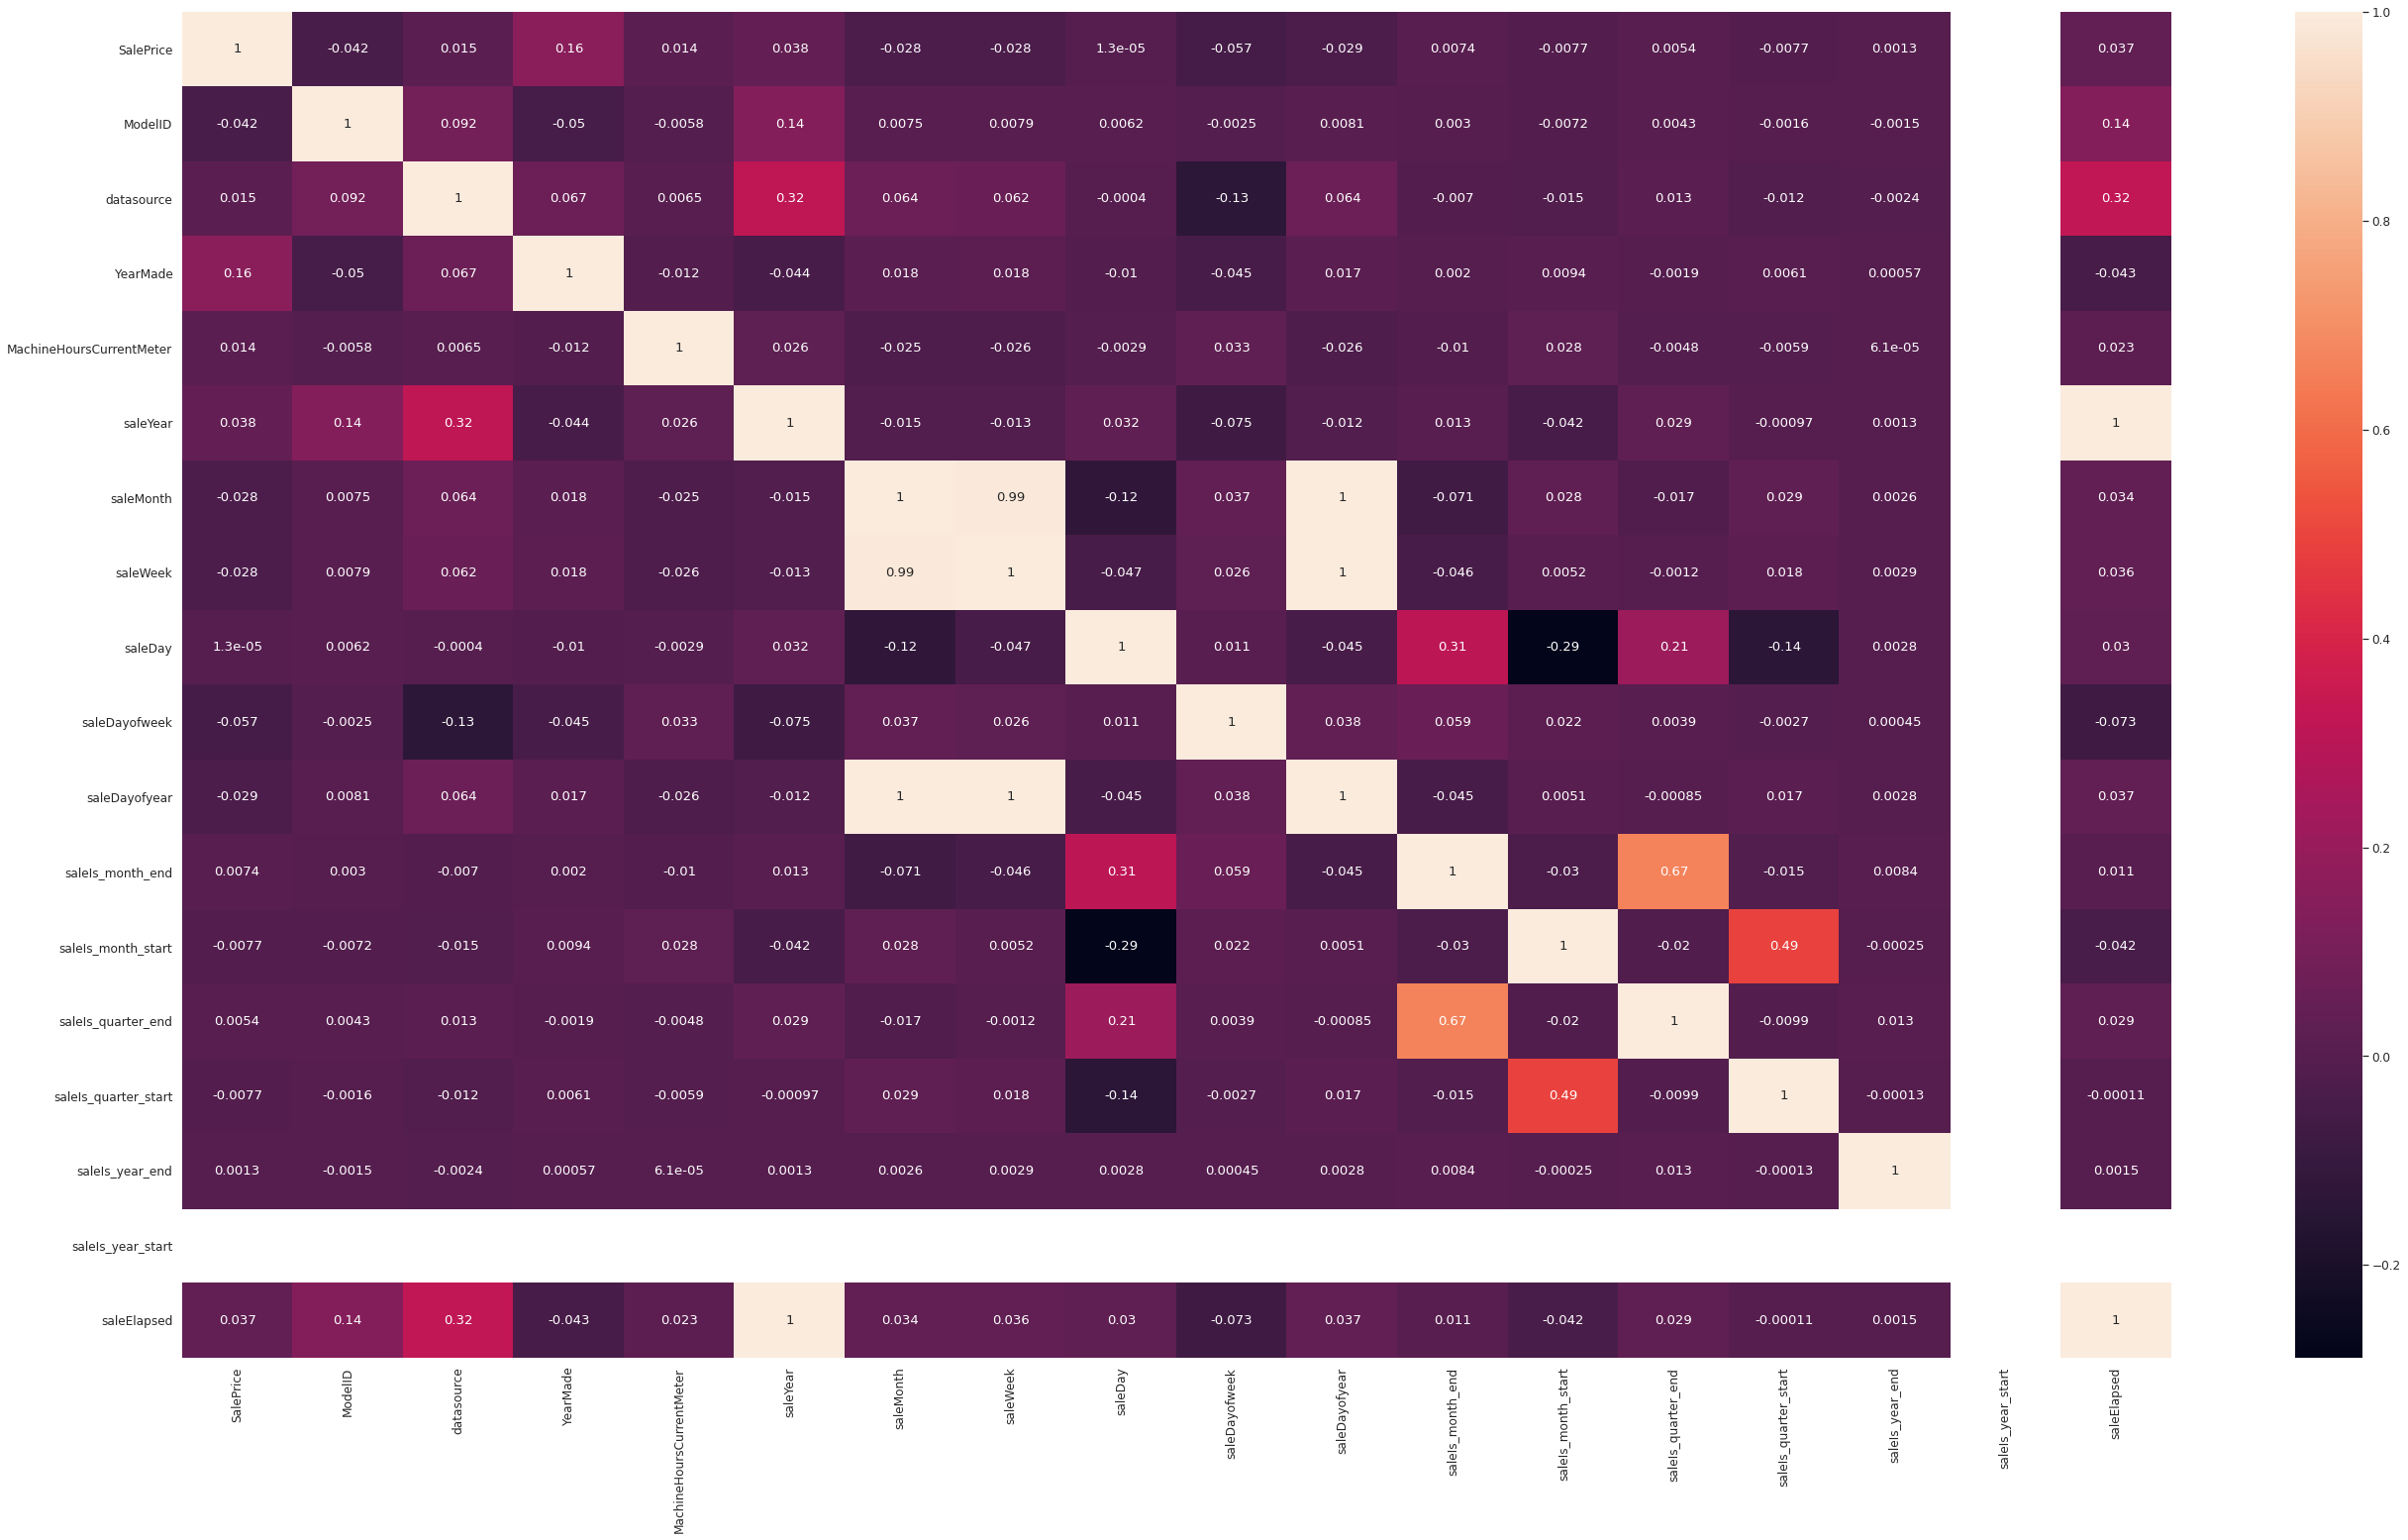

In [ ]:
plt.figure(figsize=(45,25))
sns.heatmap(df.corr(),annot=True)

Here we plot a scatter plot between 'YearMade', 'saleElapsed' to understand more about the data

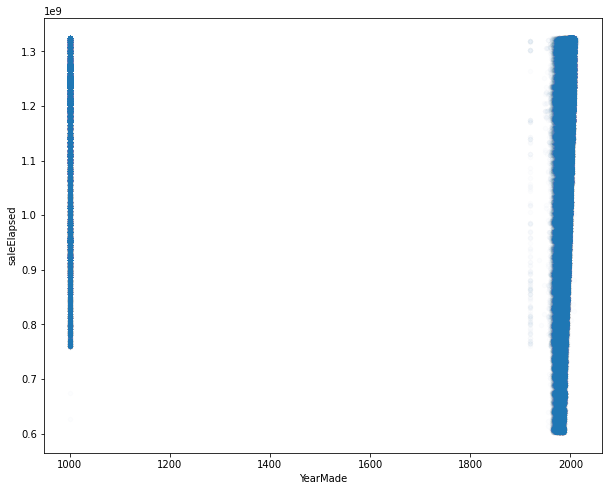

In [ ]:
df.plot('YearMade', 'saleElapsed', 'scatter', alpha=0.01, figsize=(10,8));

**As seen in the figure above bulldozers made around or 1950 have YearMade = 1000 this is one of the major issue with the data and we need to address this we will drop all those values before feeding it to the model.**

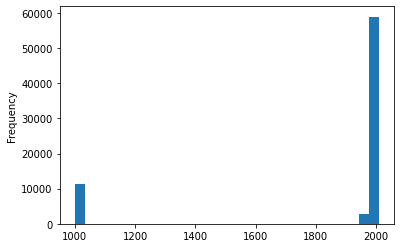

In [ ]:
df.query("MachineHoursCurrentMeter==0")['YearMade'].plot.hist(bins=30)

**Histogram shown above shows us the frequecy of those bulldozers which has the YearMade= 1000**

In [ ]:
import statsmodels.formula.api as smf
model_1 = smf.ols('SalePrice ~ YearMade + ProductSize + state', df).fit()
print(model_1.summary())
print("----- p-values ------")
print(model_1.pvalues)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     1106.
Date:                Thu, 15 Oct 2020   Prob (F-statistic):               0.00
Time:                        10:04:04   Log-Likelihood:            -2.1704e+06
No. Observations:              190350   AIC:                         4.341e+06
Df Residuals:                  190291   BIC:                         4.342e+06
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [ ]:
pair_corr_coeff = df.corr()
pair_corr_coeff.abs().style.background_gradient()

/usr/local/lib/python3.6/dist-packages/pandas/io/formats/style.py:1126: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
/usr/local/lib/python3.6/dist-packages/pandas/io/formats/style.py:1127: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


,SalePrice,ModelID,datasource,YearMade,MachineHoursCurrentMeter,saleYear,saleMonth,saleWeek,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed
SalePrice,1.000000,0.042125,0.015122,0.156453,0.013560,0.038484,0.028498,0.028018,0.000013,0.056823,0.028556,0.007401,0.007654,0.005412,0.007750,0.001261,nan,0.037051
ModelID,0.042125,1.000000,0.091757,0.049762,0.005781,0.139346,0.007542,0.007925,0.006178,0.002535,0.008089,0.002961,0.007153,0.004348,0.001567,0.001463,nan,0.139664
datasource,0.015122,0.091757,1.000000,0.067088,0.006475,0.319850,0.063777,0.062312,0.000403,0.133594,0.063588,0.007044,0.015213,0.013223,0.012075,0.002408,nan,0.322791
YearMade,0.156453,0.049762,0.067088,1.000000,0.011733,0.044084,0.017811,0.018161,0.010348,0.045306,0.017178,0.002031,0.009435,0.001904,0.006107,0.000573,nan,0.043213
MachineHoursCurrentMeter,0.013560,0.005781,0.006475,0.011733,1.000000,0.025886,0.025287,0.025679,0.002930,0.032744,0.026134,0.010088,0.027515,0.004755,0.005872,0.000061,nan,0.023057
saleYear,0.038484,0.139346,0.319850,0.044084,0.025886,1.000000,0.014792,0.012766,0.032411,0.074636,0.012390,0.012878,0.042325,0.029457,0.000966,0.001346,nan,0.998787
saleMonth,0.028498,0.007542,0.063777,0.017811,0.025287,0.014792,1.000000,0.994758,0.124482,0.036912,0.996782,0.070551,0.028325,0.017470,0.028859,0.002579,nan,0.034298
saleWeek,0.028018,0.007925,0.062312,0.018161,0.025679,0.012766,0.994758,1.000000,0.047233,0.025592,0.997786,0.046348,0.005182,0.001224,0.018374,0.002864,nan,0.036372
saleDay,0.000013,0.006178,0.000403,0.010348,0.002930,0.032411,0.124482,0.047233,1.000000,0.010905,0.044905,0.314558,0.289001,0.210393,0.142538,0.002790,nan,0.030180
saleDayofweek,0.056823,0.002535,0.133594,0.045306,0.032744,0.074636,0.036912,0.025592,0.010905,1.000000,0.037589,0.059258,0.021898,0.003871,0.002691,0.000448,nan,0.072739


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
#gather features
formula1 = 'SalePrice ~ YearMade + ProductSize + state'
# get y and X dataframes based on this regression:
yvar, Xvar = dmatrices(formula1, df, return_type='dataframe')
#print(Xvar)
# For each Xvar, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(Xvar.values, i) for i in range(Xvar.shape[1])]
vif["Predictors"] = Xvar.columns
vif.round(3)

,VIF,Predictors
0,113.277,Intercept
1,4.061,ProductSize[T.Large]
2,6.971,ProductSize[T.Large / Medium]
3,7.740,ProductSize[T.Medium]
4,4.565,ProductSize[T.Mini]
5,4.782,ProductSize[T.Small]
6,1.055,state[T.Alaska]
7,1.783,state[T.Arizona]
8,1.319,state[T.Arkansas]
9,3.674,state[T.California]


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
#gather features
formula1 = 'SalePrice ~ YearMade + Hydraulics + Tire_Size'
# get y and X dataframes based on this regression:
yvar, Xvar = dmatrices(formula1, df, return_type='dataframe')
#print(Xvar)
# For each Xvar, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(Xvar.values, i) for i in range(Xvar.shape[1])]
vif["Predictors"] = Xvar.columns
vif.round(3)

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,VIF,Predictors
0,41743.120,Intercept
1,1.023,Hydraulics[T.3 Valve]
2,1.007,Hydraulics[T.4 Valve]
3,3.542,Hydraulics[T.Auxiliary]
4,2.034,Hydraulics[T.Base + 1 Function]
5,1.010,Hydraulics[T.Base + 2 Function]
6,1.031,Hydraulics[T.Base + 3 Function]
7,1.009,Hydraulics[T.Base + 4 Function]
8,1.010,Hydraulics[T.Base + 5 Function]
9,1.006,Hydraulics[T.Base + 6 Function]


This was some of the processing that could have been done for finding some insights to the data. Later once the baseline model is ready various other things like feature importance and hyperparameter tuning can be used for improving the overall performce of the model.

In [ ]:
#from scipy.cluster import hierarchy as hc
#corr = np.round(scipy.stats.spearmanr(df).correlation, 4)
#corr_condensed = hc.distance.squareform(1-corr)
#z = hc.linkage(corr_condensed, method='average')
#fig = plt.figure(figsize=(16,10))
#dendrogram = hc.dendrogram(z, labels=df.columns, orientation='left', leaf_font_size=16)
#plt.show()


**Unique Components** Since this is a famous dataset alot of work has been done and people from data science background has literally tried everything but what makes it different is when this data was launched there was no sign of fastai but later fastai changed a lot of things such as feature importance and hyperparameter tuning got faster and easier to use. Fastai make this different as it provide a lot of possible new ideas to explore and try.



**Observations**

auctionID variable looked like it contain numerical values however it was categorical

The most important thing that we learned was that the YearMade for all the bulldozers made before 1950 was 1000 which was affecting the data quite severly. 

Out of 53 features 34 had more than 50% missing values

plotting density against each and every numerical feature showed how data vary

Plotting salesprice agaist every numerical feature give the trend how SalePrice vary with respect to different features



#References

https://medium.com/python-in-plain-english/blue-book-for-bulldozers-competition-part-1-basic-data-pre-processing-1248cd5d4214

https://mc.ai/blue-book-for-bulldozers-competition-part-1%E2%80%8A-%E2%80%8A-basic-data-pre-processing/

https://medium.com/python-in-plain-english/blue-book-for-bulldozers-competition-part-2-finding-the-right-validation-set-115175cde02c